记得先运行下面的代码

In [ ]:
pip install --user datasets

加载数据

In [1]:
from datasets import load_dataset

# 定义保存路径
scratch_dir = "/scratch/your_directory_name"  # 替换为你的实际 scratch 目录路径

# 加载并保存数据集到指定路径
ds = load_dataset("gOLIVES/OLIVES_Dataset", "biomarker_detection", cache_dir=scratch_dir)

Resolving data files:   0%|          | 0/32 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/32 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/38 [00:00<?, ?it/s]

In [2]:
import os

# 检查文件是否存储在指定目录
print("Saved datasets in:", os.listdir(scratch_dir))

Saved datasets in: ['_scratch_your_directory_name_gOLIVES___olives_dataset_biomarker_detection_0.0.0_4974b592ed709a6e227eb06bb97248c4b149f6e0.lock', 'gOLIVES___olives_dataset']


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset
from PIL import Image

In [4]:
# 列出数据存储目录结构
def list_dataset_structure(base_dir, level=2):
    for root, dirs, files in os.walk(base_dir):
        # 控制显示的层级
        depth = root[len(base_dir):].count(os.sep)
        if depth > level:
            continue
        indent = " " * 4 * depth
        print(f"{indent}{os.path.basename(root)}/")
        for file in files[:3]:  # 只显示每个文件夹的前 3 个文件
            print(f"{indent}    {file}")
    print("\nStructure listed successfully.")

# 查看数据目录结构
print("\nDataset folder structure:")
list_dataset_structure(scratch_dir)



Dataset folder structure:
your_directory_name/
    _scratch_your_directory_name_gOLIVES___olives_dataset_biomarker_detection_0.0.0_4974b592ed709a6e227eb06bb97248c4b149f6e0.lock
    gOLIVES___olives_dataset/
        biomarker_detection/

Structure listed successfully.


KeyError: 'image_path'

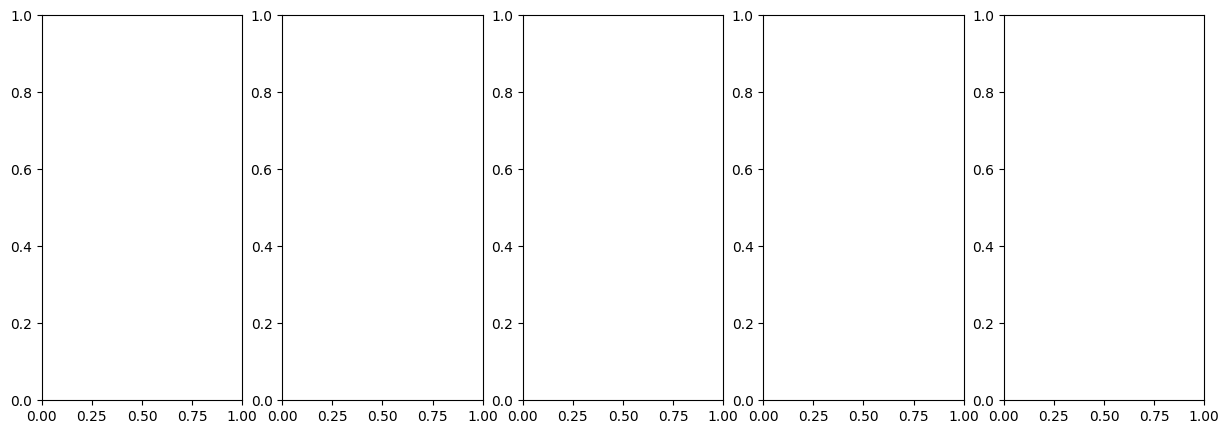

In [5]:
# 随机显示 5 个 OCT 图像及其对应标签
def preview_images(dataset, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
    for i in range(num_samples):
        # 随机选择一张图片
        sample = dataset['train'][i]
        img_path = sample['image_path']  # 假设 image_path 是存储路径的键
        label = sample['biomarker']     # 假设 biomarker 是标签

        # 加载图像并显示
        img = Image.open(img_path)
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# 调用预览函数
preview_images(ds)


In [6]:
# 查看标签分布的可视化
def plot_label_distribution(dataset):
    label_counts = dataset['train']['biomarker']
    plt.figure(figsize=(10, 6))
    plt.hist(label_counts, bins=len(set(label_counts)), edgecolor='black')
    plt.title("Biomarker Label Distribution")
    plt.xlabel("Biomarkers")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

# 绘制标签分布
plot_label_distribution(ds)

KeyError: "Column biomarker not in the dataset. Current columns in the dataset: ['Image', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'BCVA', 'CST', 'Eye_ID', 'Patient_ID']"